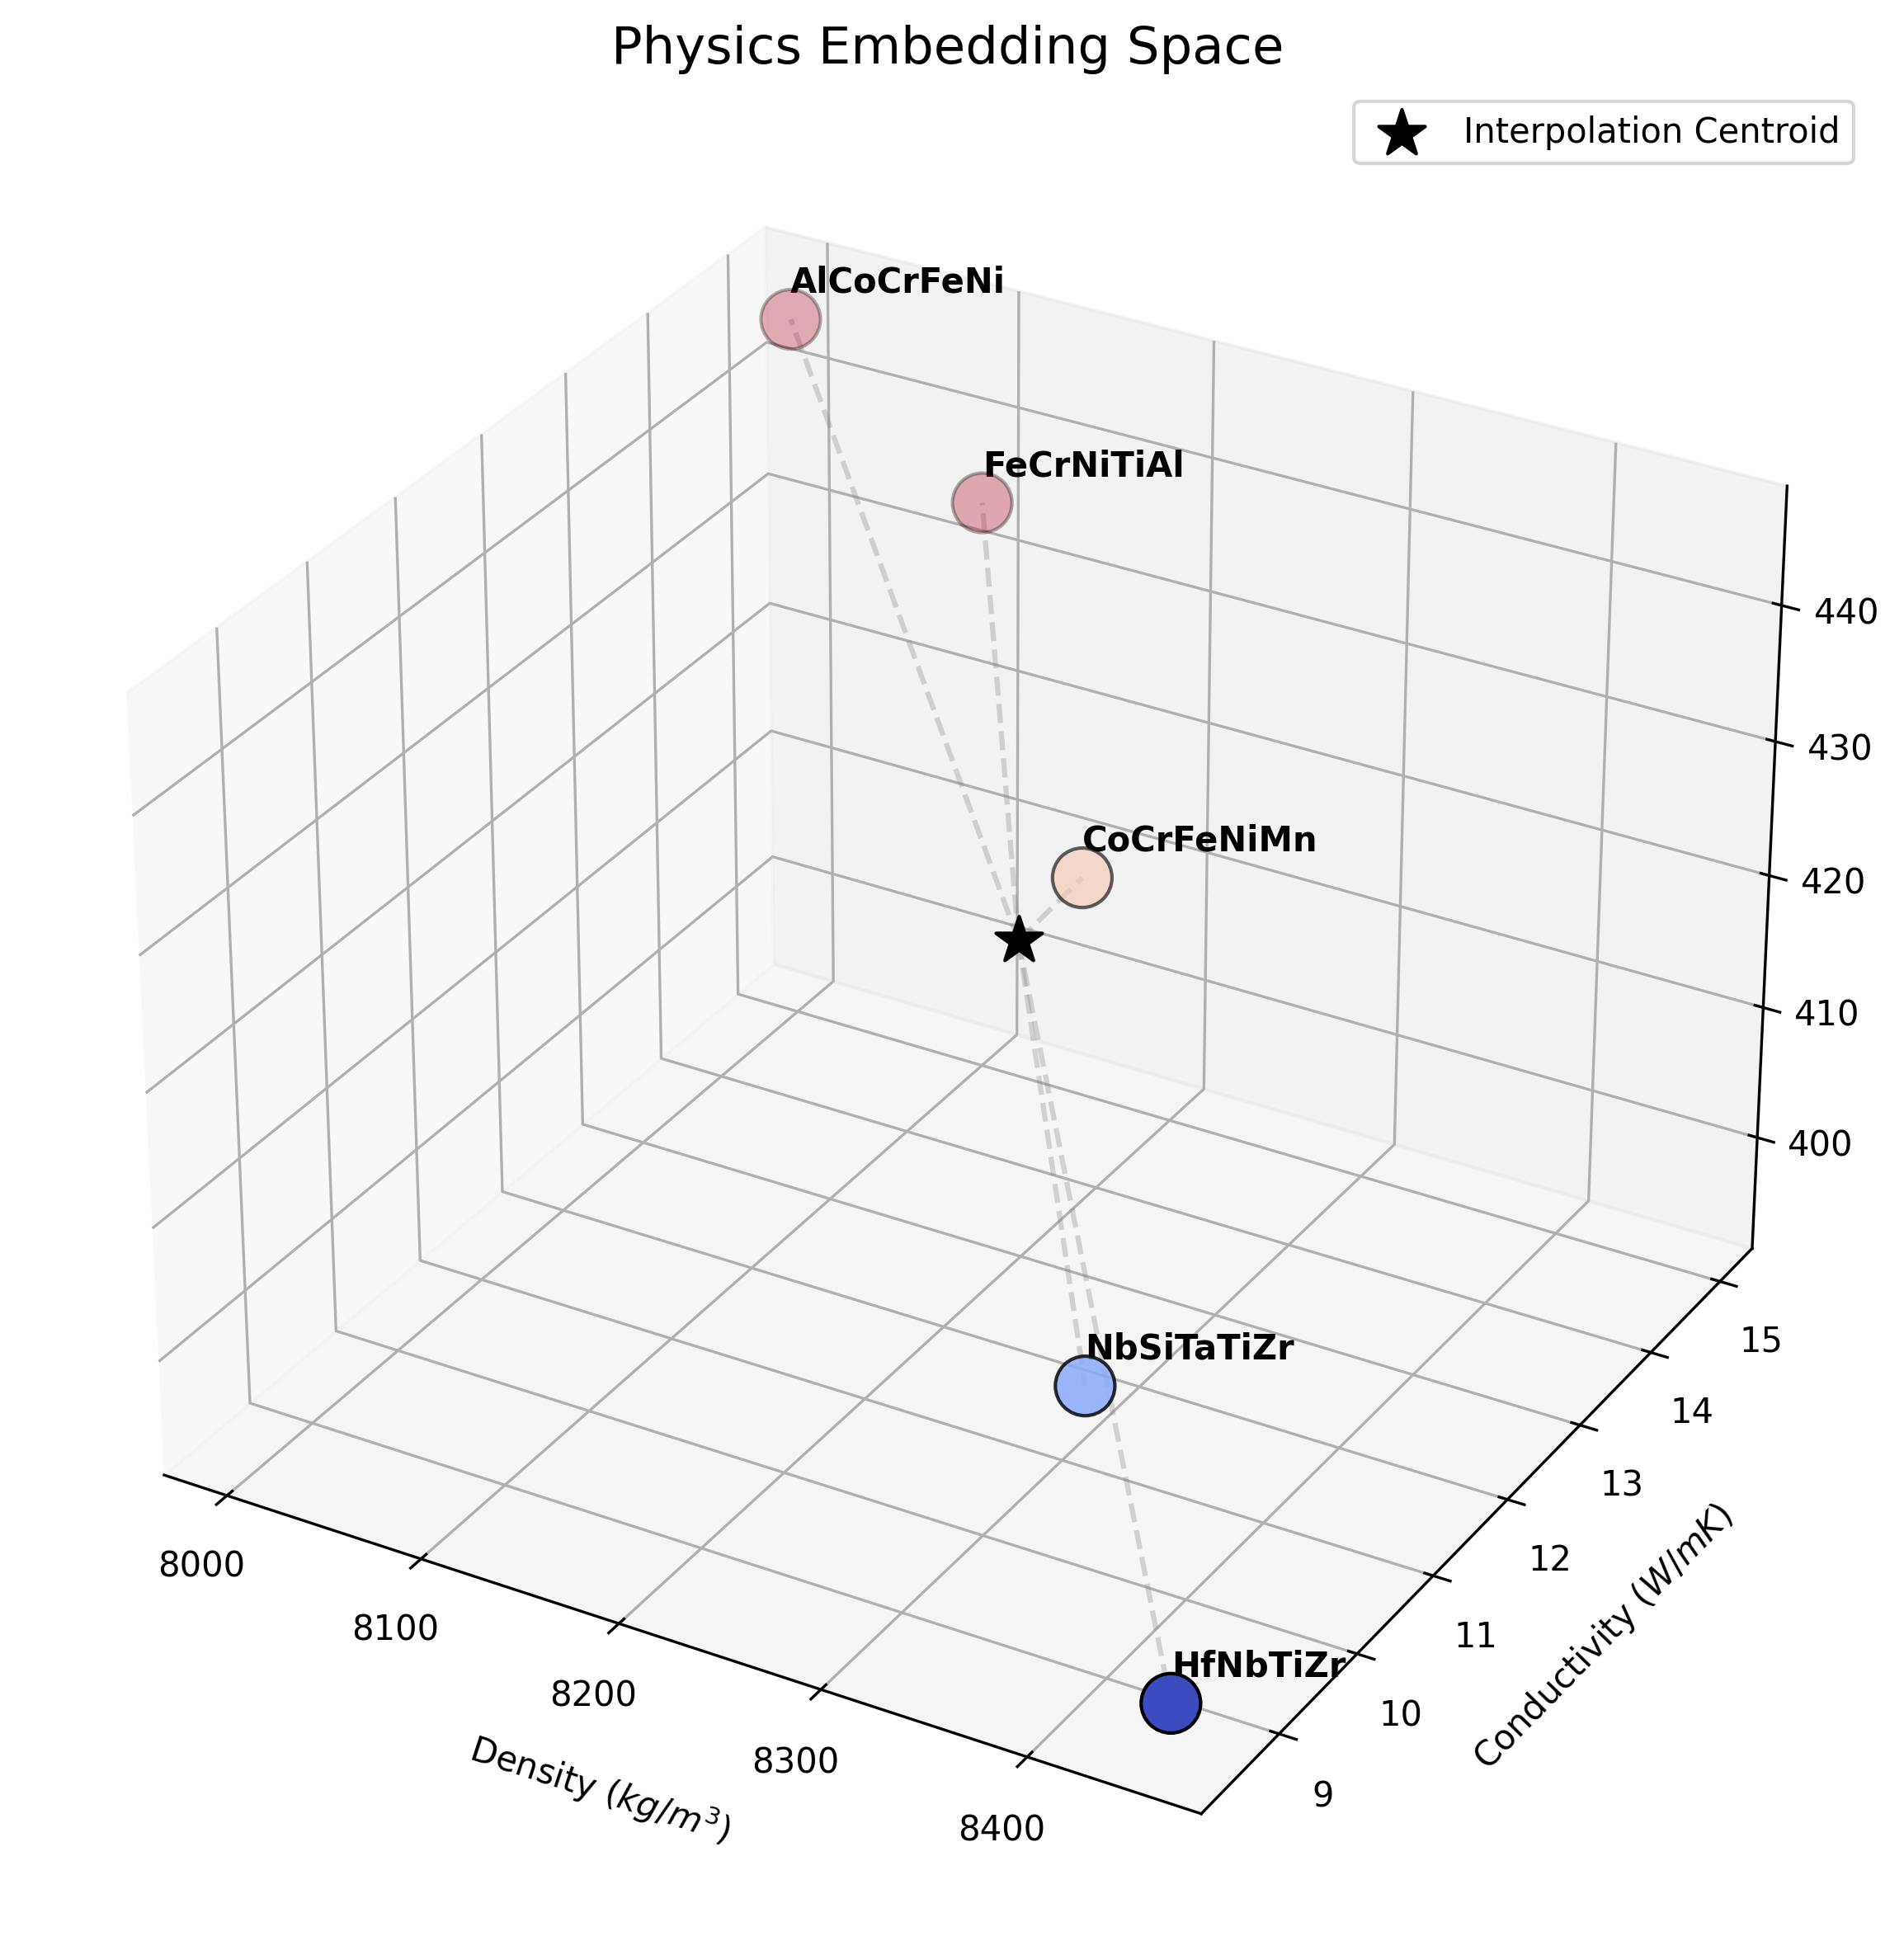

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import joblib

# --- 1. LOAD SOURCE OF TRUTH ---
# We load the assets to ensure the physics plotted matches the trained model exactly.
assets = joblib.load('digital_twin_assets.pkl')
physics_dict = assets['materials']

# Extract Data Dynamically
mats = list(physics_dict.keys())
vals = np.array(list(physics_dict.values())) # Columns: [Density, Conductivity, Cp]

# --- 2. PLOT GENERATION ---
fig = plt.figure(figsize=(10, 8), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Scatter points (Color mapped by Conductivity)
sc = ax.scatter(vals[:,0], vals[:,1], vals[:,2],
                s=300, c=vals[:,1], cmap='coolwarm',
                edgecolors='k', depthshade=True)

# Labels
for i, txt in enumerate(mats):
    # Offset text slightly in Z for readability
    ax.text(vals[i,0], vals[i,1], vals[i,2] + 2, txt,
            fontsize=10, fontweight='bold')

# Interpolation Centroid (Calculated from Loaded Data)
centroid = np.mean(vals, axis=0)
ax.scatter(centroid[0], centroid[1], centroid[2],
           c='black', marker='*', s=200,
           label=f'Interpolation Centroid')

# Connection lines (Visualizing the convex hull/distance to mean)
for i in range(len(vals)):
    ax.plot([centroid[0], vals[i,0]],
            [centroid[1], vals[i,1]],
            [centroid[2], vals[i,2]],
            'gray', linestyle='--', alpha=0.3)

# Formatting
ax.set_xlabel(r'Density ($kg/m^3$)', labelpad=10)
ax.set_ylabel(r'Conductivity ($W/mK$)', labelpad=10)
ax.set_zlabel(r'Specific Heat ($J/kgK$)', labelpad=10)
ax.set_title("Physics Embedding Space", fontsize=15)
ax.legend()

plt.tight_layout()
plt.savefig("Dashboard_PhysicsSpace.pdf")
plt.show()